## Problem Set 2: Linear Classifiers and Gradient Descent

### Overview
In this assignment, you will implement a simple linear classifier using both the SVM (hinge loss) and Softmax (cross-entropy loss) functions. You will also implement gradient descent to optimize the classifier. You will both complete this Python script (`ps2.ipynb`) and submit a LaTeX report (`ps2.tex` and `ps2.pdf`).

### Data
Use the following code to generate a dataset.

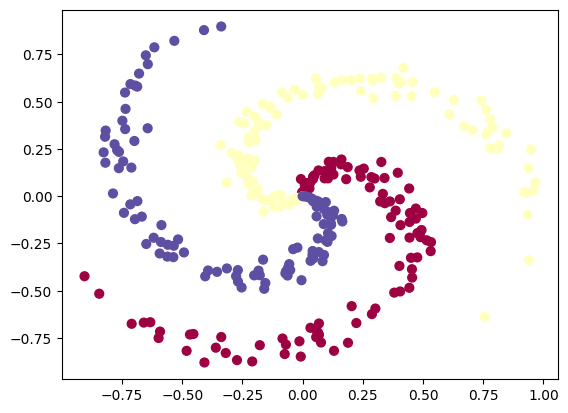

In [1]:
# Generate spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Task 1: Score Function
Implement a function to calculate the score function of a linear classifier.

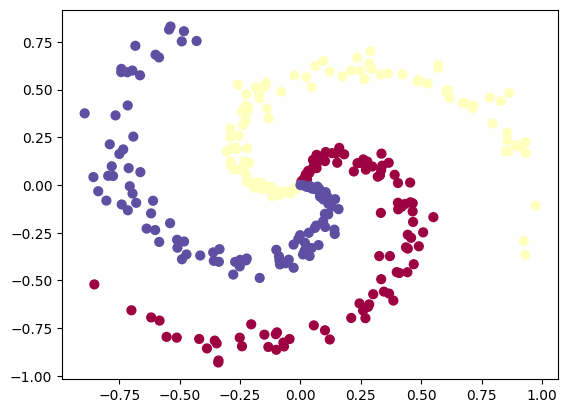

First 1 row of scores:
 [[-0.06769397  0.54871401  1.73663602]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
W = np.random.randn(2, 3)
b = np.random.randn(3)
def score_function(X, W, b):
    scores = np.dot(X, W) + b
    return scores
scores = score_function(X, W, b)
print("First 1 row of scores:\n", scores[:1])

### Task 2: Loss Functions
Implement the following loss functions:
  1. SVM Classifier (Hinge Loss).
  2. Softmax Classifier (Cross-Entropy Loss).

In [1]:

import numpy as np


def svm_loss(scores, y):
    """
    Calculate the multiclass SVM loss for a single example.
    
    :param scores: numpy array of scores for each class (output of the classifier)
    :param y: integer, the correct class index
    :return: float, the loss for the input sample
    """
    correct_class_score = scores[y]
    margin = 1  
    losses = np.maximum(0, scores - correct_class_score + margin)
    losses[y] = 0  
    return np.sum(losses)


scores = np.array([0.2, 0.4, 0.1])
y = 1  
print("SVM Loss:", svm_loss(scores, y))


def softmax_loss(scores, y):
    """
    Calculate the cross-entropy loss using softmax for a single example.
    
    :param scores: numpy array of scores from the model for each class
    :param y: integer, the correct class index
    :return: float, the loss for the input sample
    """
    shift_scores = scores - np.max(scores)
    exp_scores = np.exp(shift_scores)
    softmax_probabilities = exp_scores / np.sum(exp_scores)
    return -np.log(softmax_probabilities[y])


scores = np.array([0.2, 0.4, 0.1])
y = 1  
print("Softmax Loss:", softmax_loss(scores, y))

SVM Loss: 1.5
Softmax Loss: 0.93983106084446


### Task 3: Regularization
Add L2 regularization to your loss function.

In [5]:
def softmax_loss_with_regularization(scores, y, W, lambda_reg):
    """
    Calculate the cross-entropy loss using softmax for a single example with L2 regularization.
    
    :param scores: numpy array of scores from the model for each class
    :param y: integer, the correct class index
    :param W: numpy array, weight matrix of the classifier
    :param lambda_reg: float, regularization strength
    :return: float, the regularized loss for the input sample
    """

    shift_scores = scores - np.max(scores)
    exp_scores = np.exp(shift_scores)
    softmax_probabilities = exp_scores / np.sum(exp_scores)
    cross_entropy_loss = -np.log(softmax_probabilities[y])
    
    l2_reg = lambda_reg * np.sum(W**2)
    
    return cross_entropy_loss + l2_reg

scores = np.array([0.2, 0.4, 0.1])
y = 1
W = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]]) 
lambda_reg = 0.1  


print("Softmax Loss with Regularization:", softmax_loss_with_regularization(scores, y, W, lambda_reg))



Softmax Loss with Regularization: 1.03083106084446


### Task 4: Gradient Descent
Implement gradient descent to minimize the loss function.

In [8]:
import numpy as np

def compute_softmax_loss_and_gradient(W, X, y, lambda_reg):
    num_examples = X.shape[0]  # Number of training examples
    scores = np.dot(X, W)
    shift_scores = scores - np.max(scores, axis=1, keepdims=True)  # Numeric stability
    exp_scores = np.exp(shift_scores)
    softmax_probabilities = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    correct_log_probs = -np.log(softmax_probabilities[range(num_examples), y])
    data_loss = np.sum(correct_log_probs) / num_examples
    reg_loss = 0.5 * lambda_reg * np.sum(W * W)
    loss = data_loss + reg_loss
    
    dscores = softmax_probabilities
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    dW = np.dot(X.T, dscores)
    dW += lambda_reg * W 
    
    return loss, dW


num_examples = 300  
dim = 5  
num_classes = 3  

np.random.seed(42)
X = np.random.randn(num_examples, dim)  
y = np.random.randint(num_classes, size=num_examples)  
learning_rate = 1e-2
num_iterations = 200
lambda_reg = 0.1


W = 0.001 * np.random.randn(dim, num_classes)


for i in range(num_iterations):
    loss, grad = compute_softmax_loss_and_gradient(W, X, y, lambda_reg)
    W -= learning_rate * grad  # Update weights
    
    if i % 10 == 0:
        print(f'Iteration {i}, loss: {loss}')

print("Final loss:", loss)
print("Optimized weights:\n", W)


Iteration 0, loss: 1.0988139923881797
Iteration 10, loss: 1.0980923175227943
Iteration 20, loss: 1.0974293545604854
Iteration 30, loss: 1.0968202494405201
Iteration 40, loss: 1.096260553941703
Iteration 50, loss: 1.0957461917901279
Iteration 60, loss: 1.0952734275141656
Iteration 70, loss: 1.0948388378457865
Iteration 80, loss: 1.0944392854773455
Iteration 90, loss: 1.094071894993488
Iteration 100, loss: 1.0937340308086125
Iteration 110, loss: 1.0934232769511143
Iteration 120, loss: 1.093137418546245
Iteration 130, loss: 1.0928744248597562
Iteration 140, loss: 1.092632433774427
Iteration 150, loss: 1.0924097375810833
Iteration 160, loss: 1.0922047699747033
Iteration 170, loss: 1.0920160941547077
Iteration 180, loss: 1.0918423919365023
Iteration 190, loss: 1.0916824537887841
Final loss: 1.0915493584063678
Optimized weights:
 [[ 0.04230676 -0.03577001 -0.00534934]
 [-0.00521211  0.02514545 -0.02226465]
 [-0.04790917 -0.00740088  0.05553504]
 [ 0.01025628 -0.00743917 -0.00209458]
 [-0.038

### Task 5: LaTeX Write-Up
Document your approach and results using LaTeX. You should include the following sections:
  1. Introduction: Briefly describe the goal of the assignment.
  2. Methodology:
     - Explain the implementation of the score function.
     - Describe the hinge loss and softmax loss.
     - Discuss the regularization used.
     - Explain the gradient descent method you implemented.
  3. Results: Include any plots or results from your Python code.
  4. Conclusion: Summarize your findings and any challenges you faced.
